<a href="https://colab.research.google.com/github/hasimoka/BlazeFace-PyTorch/blob/master/InferenceONNXModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/BlazeFace-PyTorch/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/BlazeFace-PyTorch


In [2]:
!pip install onnxruntime

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def plot_detections(img, detections, with_keypoints=True):
    fig, ax = plt.subplots(1, figsize=(10, 10))
    ax.grid(False)
    ax.imshow(img)

    if detections.ndim == 1:
        detections = np.expand_dims(detections, axis=0)

    print("Found %d faces" % detections.shape[0])

    for i in range(detections.shape[0]):
        ymin = detections[i, 0] * img.shape[0]
        xmin = detections[i, 1] * img.shape[1]
        ymax = detections[i, 2] * img.shape[0]
        xmax = detections[i, 3] * img.shape[1]

        rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                 linewidth=1, edgecolor="r", facecolor="none",
                                 alpha=detections[i, 16])
        ax.add_patch(rect)

        if with_keypoints:
            for k in range(6):
                kp_x = detections[i, 4 + k*2    ] * img.shape[1]
                kp_y = detections[i, 4 + k*2 + 1] * img.shape[0]
                circle = patches.Circle((kp_x, kp_y), radius=0.5, linewidth=1,
                                        edgecolor="lightskyblue", facecolor="none",
                                        alpha=detections[i, 16])
                ax.add_patch(circle)

    plt.show()

## Load the front and back models

In [4]:
import blazeface_with_onnx as blazeface

front_net = blazeface.BlazeFaceWithOnnx()
front_net.load_anchors("./anchors.npy")
back_net = blazeface.BlazeFaceWithOnnx(back_model=True)
back_net.load_anchors("./anchors.npy")

## Make a prediction

In [5]:
import cv2

img = cv2.imread("./1face.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

front_detections = front_net.predict_on_image(img)
front_detections.shape

(1, 17)

In [6]:
front_detections

array([[0.2714351 , 0.317134  , 0.4415536 , 0.4872523 , 0.3863073 ,
        0.31266788, 0.46129563, 0.3186052 , 0.43995076, 0.35565478,
        0.432756  , 0.3914948 , 0.3153791 , 0.32960063, 0.47782823,
        0.3367067 , 0.99599206]], dtype=float32)

Found 1 faces


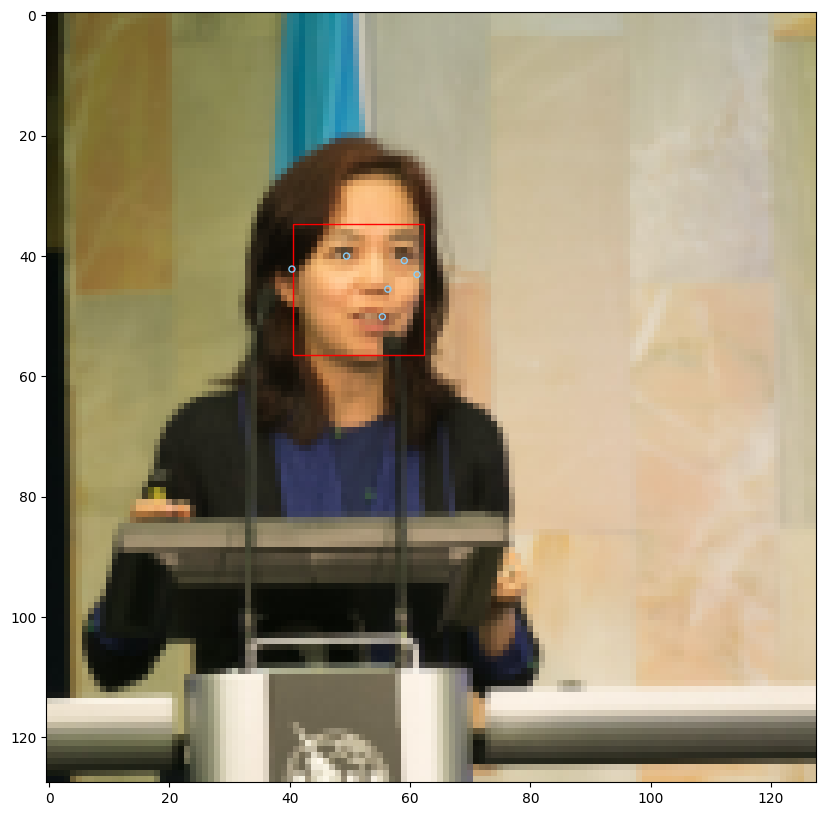

In [7]:
plot_detections(img, front_detections)

In [8]:
img2 = cv2.resize(img, (256, 256))
back_detections = back_net.predict_on_image(img2)
back_detections.shape

/content/drive/MyDrive/BlazeFace-PyTorch/blazeface_with_onnx.py:135: RuntimeWarning: overflow encountered in exp
  sigmoid_data = 1 / (1 + np.exp(-raw_score))


(1, 17)

In [9]:
back_detections

array([[0.2728792 , 0.3161727 , 0.4527032 , 0.4959967 , 0.3873329 ,
        0.3153674 , 0.45966932, 0.32117656, 0.43492746, 0.35874295,
        0.4271755 , 0.39886513, 0.3224123 , 0.33462623, 0.47966206,
        0.34324324, 0.8783335 ]], dtype=float32)

Found 1 faces


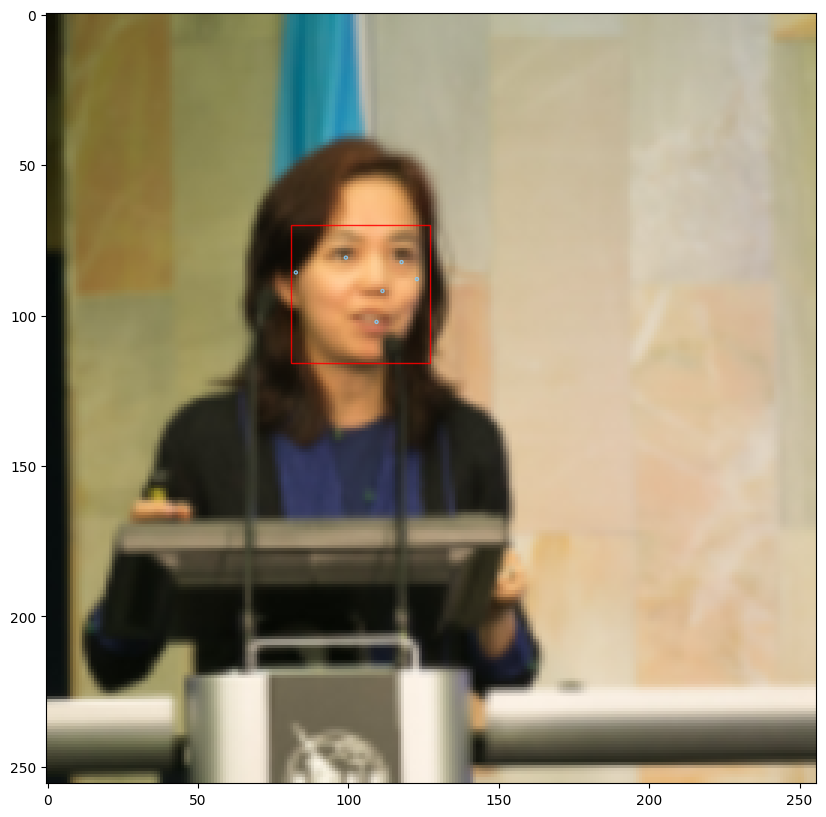

In [10]:
plot_detections(img2, back_detections)

In [11]:
import cv2

img = cv2.imread("./3faces.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

front_detections = front_net.predict_on_image(img)
front_detections.shape

(0, 17)

In [12]:
front_detections

array([], shape=(0, 17), dtype=float64)

Found 0 faces


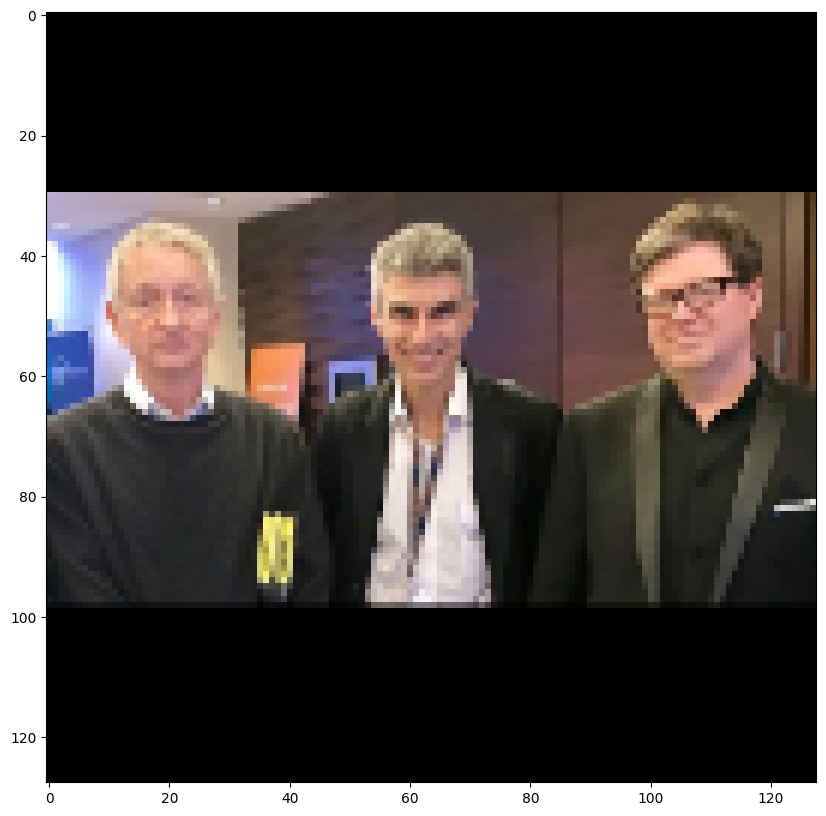

In [13]:
plot_detections(img, front_detections)

In [14]:
img2 = cv2.resize(img, (256, 256))
back_detections = back_net.predict_on_image(img2)
back_detections.shape

(3, 17)

In [15]:
back_detections

array([[0.35085475, 0.4299734 , 0.47767803, 0.5567966 , 0.46272638,
        0.39366987, 0.51740366, 0.39164641, 0.48877183, 0.42925024,
        0.491227  , 0.4488227 , 0.4367938 , 0.3942695 , 0.55209744,
        0.38925135, 0.81682533],
       [0.333608  , 0.7803528 , 0.46419573, 0.9109405 , 0.8028719 ,
        0.36912835, 0.85737544, 0.36362258, 0.8212256 , 0.39352208,
        0.8284192 , 0.42286113, 0.7915921 , 0.38765684, 0.91038257,
        0.37778485, 0.85593736],
       [0.33934078, 0.09091228, 0.4736703 , 0.22524181, 0.12925561,
        0.3777224 , 0.18761078, 0.37426022, 0.1610791 , 0.40765816,
        0.16273862, 0.4354092 , 0.09570478, 0.39236385, 0.2200943 ,
        0.38419354, 0.83988047]], dtype=float32)

Found 3 faces


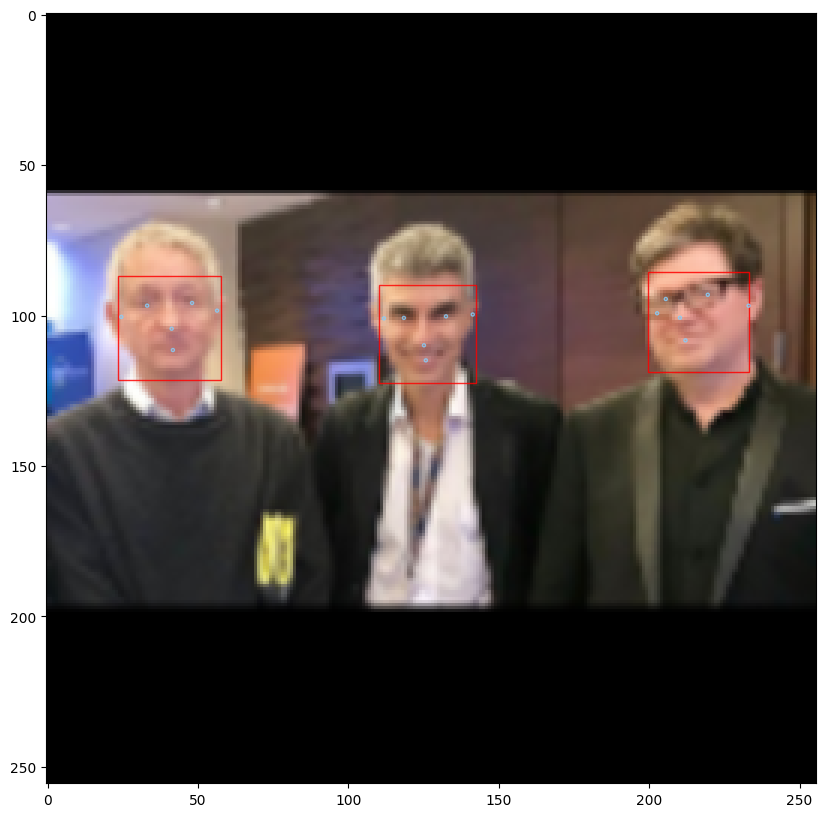

In [16]:
plot_detections(img2, back_detections)